<a href="https://colab.research.google.com/github/daianaq/data-driven-insights/blob/main/data_driven_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mini Projeto: Data-Driven Insights

Dataset: sales_data_sample.csv

##Upload do arquivo no Google Colab

In [1]:
from google.colab import files
uploaded = files.upload()

Saving sales_data_sample.csv to sales_data_sample.csv


###1. Importando as bibliotecas:

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###2. Leitura e Exploração inicial da base

In [36]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

In [37]:
# Mostra as 5 primeiras linhas
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [38]:
# Mostra a quantidade de linhas e colunas
print(df.shape)

(2823, 25)


In [39]:
# Mostra os nomes das colunas
print(df.columns)

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


In [40]:
# Mostra o tipo de dado de cada coluna
print(df.dtypes)

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object


###3. Listas, Dicionários e Tuplas

In [41]:
# Lista: nomes dos clientes
nomes = list(df['CUSTOMERNAME'])
for nome in nomes[:5]:
    print(nome)

Land of Toys Inc.
Reims Collectables
Lyon Souveniers
Toys4GrownUps.com
Corporate Gift Ideas Co.


In [10]:
# Dicionário: Nome do cliente como chave e país como valor
dicionario = dict(zip(df['CUSTOMERNAME'][:3], df['COUNTRY'][:3]))
print(dicionario)

{'Land of Toys Inc.': 'USA', 'Reims Collectables': 'France', 'Lyon Souveniers': 'France'}


In [11]:
# Tupla: Informação de uma linha
linha0 = df.iloc[0]
minha_tupla = (linha0['CUSTOMERNAME'], linha0['COUNTRY'], linha0['SALES'])
print(minha_tupla)

('Land of Toys Inc.', 'USA', np.float64(2871.0))


Insight:

Ao utilizar a lista, observei os 5 primeiros nomes dos clientes, permitindo uma visão rápida de quem está comprando.

Com o uso do dicionário, percebi que os nomes dos clientes podem estar associados a diferentes países, possibilitando identificar padrões regionais.

Por fim, a tupla me deu uma visão específica de um cliente: seu nome, país e valor de vendas.

###4. Estruturas Condicionais e Laços

In [23]:
coluna_numerica = 'SALES'
primeiro_valor = df[coluna_numerica][0]

# If: Verificar e classificar o valor do primeiro item da coluna 'SALES'
if primeiro_valor > 10000:
    print("Valor alto")
elif primeiro_valor > 5000:
    print("Valor intermediário")
else:
    print("Valor baixo")

# For: Somar os 8 primeiros elementos da coluna 'SALES'
soma = 0
lista = list(df[coluna_numerica][:8])
for n in lista:
    soma += n
print("Soma dos 8 primeiros valores da coluna SALES:", soma)

# While: Encontrar o primeiro valor maior que 3400
limite = 3400
i = 0
while i < len(lista) and lista[i] <= limite:
    i += 1
if i < len(lista):
    print("Primeiro valor >", limite, "encontrado:", lista[i])
else:
    print("Nenhum valor maior que", limite, "encontrado nos primeiros 5.")

Valor baixo
Soma dos 8 primeiros valores da coluna SALES: 29963.06
Primeiro valor > 3400 encontrado: 3884.34


Insight:

Ao aplicar uma condição no primeiro valor da coluna SALES, percebi que a venda inicial foi classificada como "baixa" de acordo com minha regra (>5000). A soma das 8 primeiras vendas totalizou um valor significativo, indicando um início de período com bom desempenho. Além disso, o laço while revelou que somente a partir do terceiro valor foi registrada uma venda superior a 3400, ou seja, as primeiras transações foram abaixo desse valor estipulado.

###5. Operadores Aritméticos e Manipulação de Dados

In [25]:
# Nova coluna com 10% de desconto aplicado sobre o valor de vendas (SALES)

df['SALES_com_desconto'] = df['SALES'] * 0.9
print(df[['ORDERNUMBER', 'SALES', 'SALES_com_desconto']].head())

   ORDERNUMBER    SALES  SALES_com_desconto
0        10107  2871.00            2583.900
1        10121  2765.90            2489.310
2        10134  3884.34            3495.906
3        10145  3746.70            3372.030
4        10159  5205.27            4684.743


Insight:

Ao aplicar um desconto de 10% sobre o valor total das vendas (SALES), criei uma nova coluna para representar o valor final com desconto. Essa transformação permite analisar o impacto de promoções no faturamento. Observando as primeiras linhas, podemos comparar facilmente o valor original e o valor com desconto, facilitando decisões estratégicas.

###6. NumPy e Arrays Numéricos

In [26]:
quantidades = np.array(df['QUANTITYORDERED'])

# Operações vetorizadas
quantidades_dobradas = quantidades * 2        # Multiplicar cada elemento por 2
quantidades_mais_cinco = quantidades + 5      # Somar 5 a cada elemento

# Acessar partes do array usando fatiamento
print("Primeiros 5 valores originais:", quantidades[:5])
print("Primeiros 5 valores multiplicados por 2:", quantidades_dobradas[:5])
print("Primeiros 5 valores somados +5:", quantidades_mais_cinco[:5])

# Modificar: substituir o valor do primeiro elemento por 100
quantidades[0] = 100
print("Valor alterado no índice 0:", quantidades[0])

# Operações agregadas
print("Soma total das quantidades:", quantidades.sum())
print("Média das quantidades:", quantidades.mean())
print("Valor máximo das quantidades:", quantidades.max())
print("Valor mínimo das quantidades:", quantidades.min())

Primeiros 5 valores originais: [ 95.7   81.35  94.74  83.26 100.  ]
Primeiros 5 valores somados +10: [105.7   91.35 104.74  93.26 110.  ]
Primeiros 5 valores ao quadrado: [ 9158.49    6617.8225  8975.6676  6932.2276 10000.    ]
Valor alterado no índice 2: 999.99
Soma dos elementos: 237073.32
Média dos elementos: 83.97921360255049


Insight:

Ao manipular o array NumPy da coluna QUANTITYORDERED, percebi que as operações vetorizadas facilitam a transformação rápida dos dados, como dobrar ou adicionar unidades a todos os pedidos simultaneamente. Modificar elementos específicos mostrou que o array é mutável e permite ajustes pontuais. As estatísticas agregadas (soma, média, máximo e mínimo) fornecem uma visão geral importante da quantidade de itens pedidos.

###7. Acesso e Manipulação de Dados com Pandas

In [29]:
print(df.loc[:4, ['CUSTOMERNAME', 'SALES']])
print(df.iloc[:3, :4])
print("---")

# Filtrar por condição: vendas (SALES) maiores que 5000
vendas_altas = df[df['SALES'] > 5000]
print(vendas_altas[['ORDERNUMBER', 'SALES']])
print("---")

# Contar valores únicos com .value_counts()
print(df['PRODUCTLINE'].value_counts())
print("---")

# Agrupar dados com .groupby() e somar vendas por produto
vendas_por_produto = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
print(vendas_por_produto)
print("---")

# Análise agregada: média de vendas por país
media_vendas_pais = df.groupby('COUNTRY')['SALES'].mean().sort_values(ascending=False)
print(media_vendas_pais)
print("---")

               CUSTOMERNAME    SALES
0         Land of Toys Inc.  2871.00
1        Reims Collectables  2765.90
2           Lyon Souveniers  3884.34
3         Toys4GrownUps.com  3746.70
4  Corporate Gift Ideas Co.  5205.27
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER
0        10107               30      95.70                2
1        10121               34      81.35                5
2        10134               41      94.74                2
---
      ORDERNUMBER    SALES
4           10159  5205.27
7           10188  5512.32
20          10341  7737.93
25          10417  7516.08
26          10103  5404.62
...           ...      ...
2685        10361  5001.92
2686        10375  5208.72
2689        10401  7084.00
2715        10397  5192.64
2820        10386  5417.57

[549 rows x 2 columns]
---
PRODUCTLINE
Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Na

Insight:

A contagem por categoria de produto (PRODUCTLINE) mostra que a categoria mais frequente é Classic Cars com 967 pedidos, seguida por Vintage Cars e Motorcycles.

Quando somamos as vendas por categoria, Classic Cars lidera com uma receita total de mais de 3,9 milhões, quase o dobro da segunda categoria, Vintage Cars.

Analisando a média das vendas por país, percebemos que países como Dinamarca, Suíça e Suécia têm valores médios de vendas ligeiramente maiores que os demais, o que pode indicar mercados mais estáveis ou clientes com pedidos de maior valor.

###8. Visualização de Dados

Gráfico de Linha

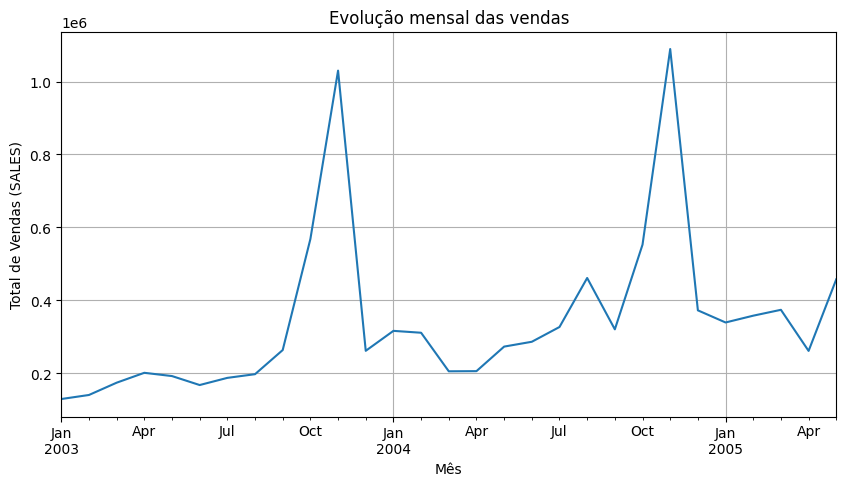

In [30]:
# Converter coluna ORDERDATE para datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Agrupar vendas por mês (ano-mês)
vendas_por_mes = df.groupby(df['ORDERDATE'].dt.to_period('M'))['SALES'].sum()

# Plotar gráfico de linha
vendas_por_mes.plot(kind='line', figsize=(10,5))
plt.title('Evolução mensal das vendas')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas (SALES)')
plt.grid(True)
plt.show()

Insight:

Gráfico de linha que mostra a tendência das vendas totais mês a mês ao longo do período disponível na base de dados. Podemos observar se há crescimento, sazonalidade ou queda nas vendas.

Gráfico de Barras

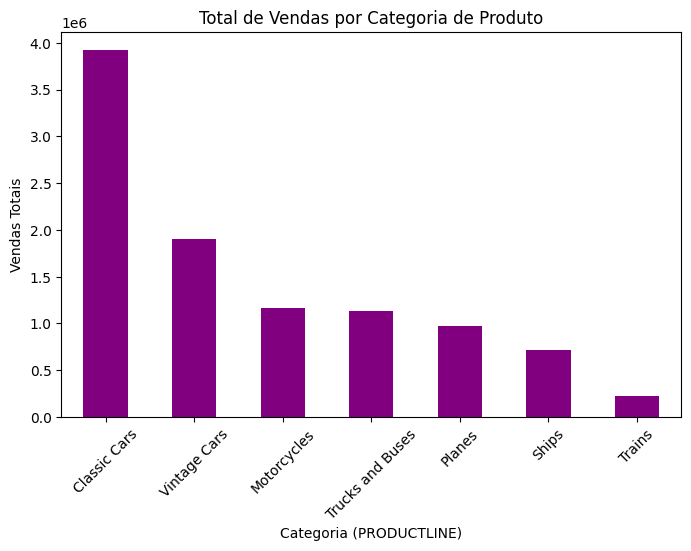

In [34]:
# Agrupar vendas por produto
vendas_por_produto = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

# Plotar gráfico de barras
vendas_por_produto.plot(kind='bar', figsize=(8,5), color='purple')
plt.title('Total de Vendas por Categoria de Produto')
plt.xlabel('Categoria (PRODUCTLINE)')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=45)
plt.show()

Insight:

Gráfico de barras que permite comparar rapidamente o faturamento gerado por cada categoria de produto, destacando quais linhas de produto são mais lucrativas.

Gráfico de Dispersão

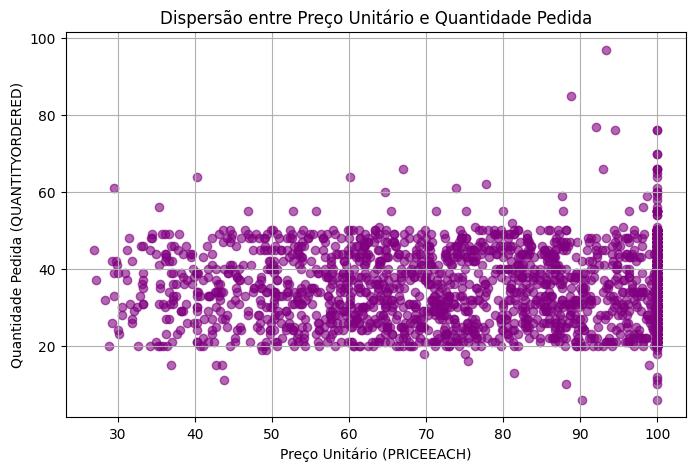

In [33]:
plt.figure(figsize=(8,5))
plt.scatter(df['PRICEEACH'], df['QUANTITYORDERED'], alpha=0.6, color='purple')
plt.title('Dispersão entre Preço Unitário e Quantidade Pedida')
plt.xlabel('Preço Unitário (PRICEEACH)')
plt.ylabel('Quantidade Pedida (QUANTITYORDERED)')
plt.grid(True)
plt.show()

Insight:

Gráfico de dispersão mostra a relação entre o preço unitário do produto e a quantidade pedida. Podemos verificar se produtos mais caros tendem a ter menores quantidades vendidas ou se há alguma correlação aparente.

###**Relatório Final**

Neste projeto, explorei a base de dados de vendas da empresa, composta por 2823 linhas e 25 colunas. Durante a análise, foi possível identificar padrões importantes:

-A categoria de produtos Classic Cars é a mais vendida, tanto em quantidade de pedidos quanto em faturamento total, destacando-se como foco principal de vendas.

-As vendas mensais apresentam variações que podem indicar sazonalidade, o que sugere investigar campanhas e promoções ao longo do ano.

-Países como Dinamarca, Suíça e Suécia apresentam média de vendas por pedido ligeiramente maiores, apontando para mercados com clientes de maior poder aquisitivo ou pedidos maiores.

###**Conclusão**

Com a análise dos dados realizada neste projeto, foi possível obter uma visão geral do comportamento de vendas da empresa. Identificamos padrões de compra por categoria, variações mensais nas vendas e diferenças relevantes entre países. Também utilizamos gráficos para visualizar tendências e relações entre variáveis, facilitando a interpretação dos dados.

Essas descobertas iniciais abrem caminho para investigações mais profundas, como entender os fatores que afetam a sazonalidade ou o impacto de estratégias de marketing em diferentes regiões. A análise de dados se mostra essencial para apoiar decisões mais estratégicas, aumentar a eficiência e identificar oportunidades de crescimento.